In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import sys, os
import copy
import seaborn as sns
from copy import deepcopy
import scipy.stats
from statsmodels.stats.multitest import multipletests
import pingouin

# Prepare Data 

In [142]:
path = "data.json"
data = json.load(open(path))

df_index = ["Participant", "Condition", "TrialId", "Trial_Type","Trialtime","Key", "RT", "ResponseTime",  "Correct_Response", "Block","Associated", "Stimulus_ID", "QR_before","QR_after","Game Choice", "Time Budget", "MDP-State", "Brain Points", "Forced Choice","Point_Mapping", "scoreA", "scoreB", "scoreC", "score", "completed"]  
df_data = []

N_TEST_TRIALS = 0
complete_responses = 0

for participant_index, participant_data in enumerate(data["values"]):
    
    response_data = participant_data[-1]
    if response_data != None:
        response = json.loads(response_data)
        #print(response)
        condition = response["condition"]
        participant = response["workerId"]
        
        timestamp = participant_data[11]
        data = response["data"]
        if participant == "614e446e77a6b2d836cb3817":
            print(data)
        #checker.append(data)
        participant_responses = []
        if len(data) > 0:
            for trial in data:
                trial_id = trial["current_trial"]
                trial_data = trial["trialdata"]
                trial_time = trial['dateTime']
                trial_type = trial_data["trial_type"]
                
                ## attention check ##
                if trial_data["trial_type"] == "categorize-html" and trial_data["block_type"] == "AttentionCheck":
                    key = trial_data["key_press"]
                    time = trial_data["time_elapsed"]
                    correct = trial_data["correct"]
                    block = trial_data["block_type"]
                    rt = trial_data["rt"]
                    participant_responses.append([participant, condition, trial_id,trial_type, trial_time,key, rt, time, correct, block])
                
                
                ## learning trials ## 
                elif trial_data["trial_type"] == "categorize-html" :
                    qr_after = trial_data["qr_after"]
                    qr_before= trial_data["qr_before"]
                    key = trial_data["key_press"]
                    time = trial_data["time_elapsed"]
                    associated = trial_data["associated_pair"]
                    correct = trial_data["correct"]
                    block = trial_data["block_type"]
                    stimulus_id = trial_data["stimulus_id"]
                    rt = trial_data["rt"]
                    participant_responses.append([participant, condition, trial_id,trial_type, trial_time,key, rt, time, correct, block, associated, stimulus_id,  qr_before, qr_after])
                
                
                ## choice trials ##
                elif trial_data["trial_type"] == "html-button-response":
                    game_choice = trial_data["game_choice"]
                    time_budget = trial_data["time"]
                    state = trial_data["state"]
                    points = trial_data["points"]
                    forced_choice = trial_data["forced_choice"]
                    key = None
                    rt =  trial_data["rt"]
                    time = trial_data["time_elapsed"]
                    correct = None 
                    block = None
                    associated = None 
                    stimulus_id = None
                    point_mapping = trial_data["point_mapping"]
                    
                    
                    participant_responses.append([participant, condition, trial_id,trial_type, trial_time, key, rt, time, correct, block, associated, stimulus_id, qr_before, qr_after, game_choice, time_budget, state, points, forced_choice, point_mapping])
                
                elif trial_data["trial_type"] == "html-keyboard-response" and "score" in trial_data.keys():
                    game_choice = trial_data["game_choice"]
                    scoreA = trial_data["scoreA"]
                    scoreB = trial_data["scoreB"]
                    scoreC = trial_data["scoreC"]
                    score = trial_data["score"]
                    completed = trial_data["completed"]
                    time = trial_data["time_elapsed"]
                    
                    participant_responses.append([participant, condition, trial_id,trial_type, trial_time, None, None, time, None, None, None, None, None, None, game_choice, None, None, None, None,point_mapping, scoreA, scoreB, scoreC, score, completed])
                    
                else:
                    pass
                    #print(trial_data["trial_type"])
        if len(participant_responses) > N_TEST_TRIALS and not participant.startswith("debug"):
            complete_responses += 1
            for d in participant_responses:
                #print(d)
                df_data.append(d)

print("Complete responses", complete_responses)
df = pd.DataFrame(df_data, columns=df_index)
df["Trialtime"] = df["Trialtime"].astype("datetime64[ms]")
df.head()

[]
Complete responses 336


,Participant,Condition,TrialId,Trial_Type,Trialtime,Key,RT,ResponseTime,Correct_Response,Block,Associated,Stimulus_ID,QR_before,QR_after,Game Choice,Time Budget,MDP-State,Brain Points,Forced Choice,Point_Mapping,scoreA,scoreB,scoreC,score,completed
0,6153585f09ade80b81c80c18,0,1,html-button-response,2021-11-03 17:24:33.998,NaN,12684.0,294480,None,None,None,None,1.0,1.0,0,40.0,400008000080000,"[5, 5, 5]",0.0,"[a, b, c]",NaN,NaN,NaN,NaN,None
1,6153585f09ade80b81c80c18,0,2,categorize-html,2021-11-03 17:24:39.505,NaN,NaN,299987,False,Similarity,False,base3,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
2,6153585f09ade80b81c80c18,0,3,categorize-html,2021-11-03 17:24:44.821,70.0,3010.0,305303,True,Similarity,True,base1,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
3,6153585f09ade80b81c80c18,0,4,categorize-html,2021-11-03 17:24:49.667,70.0,2540.0,310149,True,Similarity,True,base0,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
4,6153585f09ade80b81c80c18,0,5,categorize-html,2021-11-03 17:24:53.393,70.0,1419.0,313876,False,Similarity,False,base2,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None


In [143]:
## Add correct Block names 
block_names = df[df["Stimulus_ID"].apply(lambda x: x is not None)]["Stimulus_ID"].apply(lambda x: x[:-1])
block_names
df.loc[block_names.index,"Block"] = block_names



In [144]:
## Attention Checks 

x = df[df["Block"].apply(lambda x: x == "AttentionCheck")]#
x = x[x["Trial_Type"]=="categorize-html"]
x = x[x["Correct_Response"]== False]#x
y = x.groupby("Participant").size()

attention_filter = y[y>1]
#print(attention_filter)
print(len(attention_filter))
mask = df["Participant"].isin(attention_filter.index)
df = df[~mask]

df.head()

35


,Participant,Condition,TrialId,Trial_Type,Trialtime,Key,RT,ResponseTime,Correct_Response,Block,Associated,Stimulus_ID,QR_before,QR_after,Game Choice,Time Budget,MDP-State,Brain Points,Forced Choice,Point_Mapping,scoreA,scoreB,scoreC,score,completed
0,6153585f09ade80b81c80c18,0,1,html-button-response,2021-11-03 17:24:33.998,NaN,12684.0,294480,None,None,None,None,1.0,1.0,0,40.0,400008000080000,"[5, 5, 5]",0.0,"[a, b, c]",NaN,NaN,NaN,NaN,None
1,6153585f09ade80b81c80c18,0,2,categorize-html,2021-11-03 17:24:39.505,NaN,NaN,299987,False,base,False,base3,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
2,6153585f09ade80b81c80c18,0,3,categorize-html,2021-11-03 17:24:44.821,70.0,3010.0,305303,True,base,True,base1,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
3,6153585f09ade80b81c80c18,0,4,categorize-html,2021-11-03 17:24:49.667,70.0,2540.0,310149,True,base,True,base0,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
4,6153585f09ade80b81c80c18,0,5,categorize-html,2021-11-03 17:24:53.393,70.0,1419.0,313876,False,base,False,base2,0.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None


In [145]:
## Responses 

x = df[df["Trial_Type"]=="categorize-html"]
x = x[x["Key"].isna()]
y = x.groupby("Participant").size()
attention_filter = y[y>54]
print(len(attention_filter))
mask = df["Participant"].isin(attention_filter.index)
df = df[~mask]
print(len(df["Participant"].unique()))

0
301


In [164]:
## Check if anyone completed early

completers = df[df["completed"] == True]["Participant"]
completers
df[df["Participant"]=="6144e1726c6ad6814dcf06e7"].tail(15)

,Participant,Condition,TrialId,Trial_Type,Trialtime,Key,RT,ResponseTime,Correct_Response,Block,Associated,Stimulus_ID,QR_before,QR_after,Game Choice,Time Budget,MDP-State,Brain Points,Forced Choice,Point_Mapping,scoreA,scoreB,scoreC,score,completed
72800,6144e1726c6ad6814dcf06e7,4,187,categorize-html,2021-11-03 17:19:47.748,70.0,2222.0,812128,True,base,True,base1,4.0,4.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72801,6144e1726c6ad6814dcf06e7,4,188,categorize-html,2021-11-03 17:19:51.535,70.0,1479.0,815916,True,base,True,base0,3.0,4.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72802,6144e1726c6ad6814dcf06e7,4,189,html-keyboard-response,2021-11-03 17:19:54.840,NaN,NaN,819219,None,None,None,None,NaN,NaN,2,NaN,None,None,NaN,"[c, b, a]",29.0,37.0,18.0,3.0,False
72803,6144e1726c6ad6814dcf06e7,4,190,html-button-response,2021-11-03 17:19:56.073,NaN,1231.0,820453,None,None,None,None,3.0,4.0,1,9.0,000040101601016,"[0, 1, 0]",1.0,"[c, b, a]",NaN,NaN,NaN,NaN,None
72804,6144e1726c6ad6814dcf06e7,4,191,categorize-html,2021-11-03 17:20:01.373,70.0,3298.0,825754,True,medsim,True,medsim5,4.0,4.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72805,6144e1726c6ad6814dcf06e7,4,192,categorize-html,2021-11-03 17:20:06.597,74.0,2919.0,830978,True,medsim,False,medsim7,4.0,4.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72806,6144e1726c6ad6814dcf06e7,4,193,categorize-html,2021-11-03 17:20:10.609,70.0,1706.0,834990,False,medsim,False,medsim3,1.0,1.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72807,6144e1726c6ad6814dcf06e7,4,194,categorize-html,2021-11-03 17:20:14.407,74.0,1495.0,838788,True,medsim,False,medsim6,3.0,4.0,None,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None
72808,6144e1726c6ad6814dcf06e7,4,195,html-keyboard-response,2021-11-03 17:20:17.710,NaN,NaN,842090,None,None,None,None,NaN,NaN,1,NaN,None,None,NaN,"[c, b, a]",29.0,40.0,18.0,3.0,False
72809,6144e1726c6ad6814dcf06e7,4,196,html-button-response,2021-11-03 17:20:19.612,NaN,1901.0,843993,None,None,None,None,3.0,4.0,0,8.0,000040100701016,"[1, 0, 0]",0.0,"[c, b, a]",NaN,NaN,NaN,NaN,None


In [165]:
# update last states for completers manually 
df.loc[12193, "MDP-State"] = "000040100700207"
df.loc[32152, "MDP-State"] = "000040000800017"
df.loc[34830, "MDP-State"] = "000040000800008"
df.loc[45761, "MDP-State"] = "000040000801007"
df.loc[50842, "MDP-State"] = "000040100701007"
df.loc[51763, "MDP-State"] = "000040001700008"
df.loc[53929, "MDP-State"] = "000040001700008"
df.loc[54417, "MDP-State"] = "000040001700017"
df.loc[57046, "MDP-State"] = "000040001700107"
df.loc[58260, "MDP-State"] = "000040100700107"
df.loc[61426, "MDP-State"] = "000040100701007"
df.loc[66757, "MDP-State"] = "000040010700008"
df.loc[72814, "MDP-State"] = "000040100701007"

In [166]:
## Calculate dependent Variables

# Learned Words
av_df = pd.DataFrame()
last_state = df.groupby("Participant")["MDP-State"].agg('last')

def compute_completed_words(state):
    return int(state[4]) + int(state[9]) + int(state[14])

def compute_sum_qr(state):
    s = 0
    for i in range(5):
        
        s += i * int(state[i])+ i * int(state[i+5]) + i * int(state[i+10])
    return s
av_df["Final State"] = last_state
av_df["Learned Words"] = last_state.apply(lambda x: compute_completed_words(x)) 
av_df["QR-Sum"] = last_state.apply(lambda x: compute_sum_qr(x)) 


In [167]:
ind_mapping = df.groupby("Participant")["Point_Mapping"].apply(list).apply(lambda x: x[0])
condition = df.groupby("Participant")["Condition"].apply(list).apply(lambda x: x[0])
av_df["Condition"] = condition
av_df["Mapping"] = ind_mapping


In [168]:
base_choices = []
med_sim_choices = []
sim_choices = []
for participant in av_df.index:
    base_choice = av_df.loc[participant, "Mapping"].index("a")
    base_choices.append(base_choice)
    med_sim_choice = av_df.loc[participant, "Mapping"].index("b")
    med_sim_choices.append(med_sim_choice)
    sim_choice = av_df.loc[participant, "Mapping"].index("c")
    sim_choices.append(sim_choice)
av_df["BaseChoices"] = base_choices
av_df["MedsimChoices"] = med_sim_choices
av_df["SimChoices"] = sim_choices

In [169]:
av_df

,Final State,Learned Words,QR-Sum,Condition,Mapping,BaseChoices,MedsimChoices,SimChoices
Participant,,,,,,,,
5b0ac060451e0f0001a0fca6,000040100701016,17,73,4,"[c, b, a]",2,1,0
5b3b5f13dd6af000014d2a68,011200215002006,6,54,2,"[b, c, a]",2,0,1
5b5393228fb8db0001a81c7e,020200323000008,8,56,0,"[a, b, c]",0,1,2
5b8b1831c1113100015f88ac,001030002600026,15,74,4,"[b, c, a]",2,0,1
5bd87898f2d1e600015b9918,011020112402231,7,55,0,"[b, c, a]",2,0,1
5be36e0d675c2c000149fbaa,001030133102240,4,52,3,"[b, a, c]",1,0,2
5c0e9cd3b9211d0001d7ec58,010030210503500,8,50,4,"[c, b, a]",2,1,0
5c7c3a866fa756000182443e,001030115100026,10,66,0,"[b, a, c]",1,0,2
5c7cf1adc8c9920015d0bc60,020020001703500,9,54,1,"[c, a, b]",1,2,0


In [170]:
x = df[df["Game Choice"] == "0"]
y = x.groupby("Participant").size()
av_df["Choice0"] = y / 2
av_df["Choice0"].fillna(0, inplace = True)

x = df[df["Game Choice"] == "1"]
y = x.groupby("Participant").size()
av_df["Choice1"] = y / 2
av_df["Choice1"].fillna(0, inplace = True)

x = df[df["Game Choice"] == "2"]
y = x.groupby("Participant").size()
av_df["Choice2"] = y / 2
av_df["Choice2"].fillna(0, inplace = True)



n_base_choice = []
n_medsim_choice = []
n_sim_choice = []
for participant in av_df.index:
    n_base_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "BaseChoices"])])
    n_medsim_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "MedsimChoices"])])
    n_sim_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "SimChoices"])])
    
av_df["N_BaseChoices"] = n_base_choice
av_df["N_MedsimChoices"] = n_medsim_choice
av_df["N_SimChoices"] = n_sim_choice
summ = [a + b+ c for a,b,c in zip(n_base_choice, n_medsim_choice, n_sim_choice)]
av_df["N_Choices"] = summ
av_df["Perc_BaseChoice"] = [ n/s for n, s in zip(n_base_choice, summ)]
av_df["Perc_MedsimChoice"] = [ n/s for n, s in zip(n_medsim_choice, summ)]
av_df["Perc_SimChoice"] = [ n/s for n, s in zip(n_sim_choice, summ)]

In [171]:
#df["scoreA"].groupby(df["Participant"]).fillna(method = 'ffill', inplace = True)
df["scoreA"] = df.groupby('Participant')["scoreA"].ffill()
df["scoreB"] = df.groupby('Participant')["scoreB"].ffill()
df["scoreC"] = df.groupby('Participant')["scoreC"].ffill()

In [172]:
path = "../pilot study model/optimal_brain_points_scaled_1101.json"
obp = json.load(open(path))


game_chosen = df["Game Choice"] == "0" 
end_screen_trials = df["Trial_Type"] == "html-keyboard-response"
df["Game0_cum"] = [g and e for g,e, in zip(game_chosen,end_screen_trials)]
df["Game0_cum"] = df.groupby("Participant")[["Game0_cum"]].cumsum()

game_chosen = df["Game Choice"] == "1" 
end_screen_trials = df["Trial_Type"] == "html-keyboard-response"
df["Game1_cum"] = [g and e for g,e, in zip(game_chosen,end_screen_trials)]
df["Game1_cum"] = df.groupby("Participant")[["Game1_cum"]].cumsum()

game_chosen = df["Game Choice"] == "2" 
end_screen_trials = df["Trial_Type"] == "html-keyboard-response"
df["Game2_cum"] = [g and e for g,e, in zip(game_chosen,end_screen_trials)]
df["Game2_cum"] = df.groupby("Participant")[["Game2_cum"]].cumsum()

df["weightedScoreA"] = df["scoreA"] / df["Game0_cum"]
df["weightedScoreB"] = df["scoreB"] / df["Game1_cum"]
df["weightedScoreC"] = df["scoreC"] / df["Game2_cum"]
df["weightedScoreA"].fillna(0, inplace = True)
df["weightedScoreB"].fillna(0, inplace = True)
df["weightedScoreC"].fillna(0, inplace = True)

def check_choice_for_highest_score(x):
    #print(x)
    if x["Trial_Type"] == "html-button-response":
        scores = [x["weightedScoreA"], x["weightedScoreB"],x["weightedScoreC"]]
        #print(scores)
        m = max(scores)
        max_i = [str(i) for i, j in enumerate(scores) if j == m]
        #print(max_i)
        return x["Game Choice"]  in max_i
    
def check_choice_for_highest_shownpoints(x):
    #print(x)
    if x["Trial_Type"] == "html-button-response":
        points = x["Brain Points"]
        #print(scores)
        m = max(points)
        max_i = [str(i) for i, j in enumerate(points) if j == m]
        #print(max_i)
        return x["Game Choice"]  in max_i
    
def check_choice_for_highest_optpoints(x):
    #print(x)
    if x["Trial_Type"] == "html-button-response":
        points = obp[x["MDP-State"]]
        ordered_points = []
        for mapper in x["Point_Mapping"]:
            ordered_points.append(points[mapper])
        m = max(ordered_points)
        max_i = [str(i) for i, j in enumerate(ordered_points) if j == m]
        #print(max_i)
        return x["Game Choice"]  in max_i

df["HS_chosen"] = df.apply(lambda x: check_choice_for_highest_score(x), axis=1)
df["HPshown_chosen"] = df.apply(lambda x: check_choice_for_highest_shownpoints(x), axis=1)
df["HPoptimal_chosen"] = df.apply(lambda x: check_choice_for_highest_optpoints(x), axis=1)

In [173]:
x = df[df["Trial_Type"]=="html-button-response"]
av_df["HS_Chosen"] = x.groupby("Participant")["HS_chosen"].sum() / x.groupby("Participant")["HS_chosen"].size()
av_df["HPshown_chosen"] = x.groupby("Participant")["HPshown_chosen"].sum() / x.groupby("Participant")["HPshown_chosen"].size()
av_df["HPoptimal_chosen"] = x.groupby("Participant")["HPoptimal_chosen"].sum() / x.groupby("Participant")["HPoptimal_chosen"].size()

In [174]:
av_df.isnull().values.any()

False

In [175]:
def base_mastered(x):
    if x[4] == "4":
        return True
    else:
        return False 
def medsim_mastered(x):
    if x[9] == "8":
        return True
    elif x[9] == "7":
        return True
    else:
        return False 
def sim_mastered(x):
    if x[14] == "8":
        return True
    elif x[14] == "7":
        return True
    else:
        return False 
def count_skills(x):
    return x["BaseMastered"] + x["MedsimMastered"] + x["SimMastered"]
    
av_df["BaseMastered"] = df.groupby("Participant")["MDP-State"].agg('last').apply(lambda x: base_mastered(x))
df["BaseMastered"] = df[df["Trial_Type"]=="html-button-response"]["MDP-State"].apply(lambda x: base_mastered(x))
av_df["MedsimMastered"] = df.groupby("Participant")["MDP-State"].agg('last').apply(lambda x: medsim_mastered(x))
df["MedsimMastered"] = df[df["Trial_Type"]=="html-button-response"]["MDP-State"].apply(lambda x: medsim_mastered(x))
av_df["SimMastered"] = df.groupby("Participant")["MDP-State"].agg('last').apply(lambda x: sim_mastered(x))
df["SimMastered"] = df[df["Trial_Type"]=="html-button-response"]["MDP-State"].apply(lambda x: sim_mastered(x))
av_df["N_skills"] = av_df.apply(lambda x: count_skills(x), axis = 1)
df["N_skills"] = df[df["Trial_Type"]=="html-button-response"].apply(lambda x: count_skills(x), axis = 1)

In [176]:
av_df.columns

Index(['Final State', 'Learned Words', 'QR-Sum', 'Condition', 'Mapping',
       'BaseChoices', 'MedsimChoices', 'SimChoices', 'Choice0', 'Choice1',
       'Choice2', 'N_BaseChoices', 'N_MedsimChoices', 'N_SimChoices',
       'N_Choices', 'Perc_BaseChoice', 'Perc_MedsimChoice', 'Perc_SimChoice',
       'HS_Chosen', 'HPshown_chosen', 'HPoptimal_chosen', 'BaseMastered',
       'MedsimMastered', 'SimMastered', 'N_skills'],
      dtype='object')

In [177]:
x = df[df["N_skills"]>= 1]

a = df[df["Game Choice"] == "0"]
y = a.groupby("Participant").size()
av_df["Choice0"] = y / 2
av_df["Choice0"].fillna(0, inplace = True)

a = df[df["Game Choice"] == "1"]
y = a.groupby("Participant").size()
av_df["Choice1"] = y / 2
av_df["Choice1"].fillna(0, inplace = True)

a = df[df["Game Choice"] == "2"]
y = a.groupby("Participant").size()
av_df["Choice2"] = y / 2
av_df["Choice2"].fillna(0, inplace = True)



n_base_choice = []
n_medsim_choice = []
n_sim_choice = []
for participant in av_df.index:
    n_base_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "BaseChoices"])])
    n_medsim_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "MedsimChoices"])])
    n_sim_choice.append( av_df.loc[participant, "Choice"+str(av_df.loc[participant, "SimChoices"])])
    
av_df["N_BaseChoices_ASA"] = n_base_choice
av_df["N_MedsimChoices_ASA"] = n_medsim_choice
av_df["N_SimChoices_ASA"] = n_sim_choice
summ = [a + b+ c for a,b,c in zip(n_base_choice, n_medsim_choice, n_sim_choice)]
av_df["N_Choices_ASA"] = summ
av_df["Perc_BaseChoice_ASA"] = [ n/s for n, s in zip(n_base_choice, summ)]
av_df["Perc_MedsimChoice_ASA"] = [ n/s for n, s in zip(n_medsim_choice, summ)]
av_df["Perc_SimChoice_ASA"] = [ n/s for n, s in zip(n_sim_choice, summ)]

av_df["HS_Chosen_ASA"] = x.groupby("Participant")["HS_chosen"].sum() / x.groupby("Participant")["HS_chosen"].size()
av_df["HPshown_chosen_ASA"] = x.groupby("Participant")["HPshown_chosen"].sum() / x.groupby("Participant")["HPshown_chosen"].size()
av_df["HPoptimal_chosen_ASA"] = x.groupby("Participant")["HPoptimal_chosen"].sum() / x.groupby("Participant")["HPoptimal_chosen"].size()
#av_df["Perc_BaseChoice_ASA"] = x.groupby("Participant")["Perc_BaseChoice"].sum() / x.groupby("Participant")["Perc_BaseChoice"].size()

In [178]:
x = df[df["N_skills"]>= 1]


first_state = x.groupby("Participant")["MDP-State"].agg('first')
last_state = x.groupby("Participant")["MDP-State"].agg('last')


#av_df["Final State "] = last_state
av_df["Learned Words ASA"] = last_state.apply(lambda x: compute_completed_words(x)) 
av_df["QR-Sum ASA"] = last_state.apply(lambda x: compute_sum_qr(x)) 
av_df["Learned Words Increase ASA"] = av_df["Learned Words ASA"]  - first_state.apply(lambda x: compute_completed_words(x))
av_df["QR-Sum Increase ASA"] = av_df["QR-Sum ASA"] - first_state.apply(lambda x: compute_sum_qr(x))

In [179]:
av_df

,Final State,Learned Words,QR-Sum,Condition,Mapping,BaseChoices,MedsimChoices,SimChoices,Choice0,Choice1,Choice2,N_BaseChoices,N_MedsimChoices,N_SimChoices,N_Choices,Perc_BaseChoice,Perc_MedsimChoice,Perc_SimChoice,HS_Chosen,HPshown_chosen,HPoptimal_chosen,BaseMastered,MedsimMastered,SimMastered,N_skills,N_BaseChoices_ASA,N_MedsimChoices_ASA,N_SimChoices_ASA,N_Choices_ASA,Perc_BaseChoice_ASA,Perc_MedsimChoice_ASA,Perc_SimChoice_ASA,HS_Chosen_ASA,HPshown_chosen_ASA,HPoptimal_chosen_ASA,Learned Words ASA,QR-Sum ASA,Learned Words Increase ASA,QR-Sum Increase ASA
Participant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5b0ac060451e0f0001a0fca6,000040100701016,17,73,4,"[c, b, a]",2,1,0,14.0,16.0,10.0,10.0,16.0,14.0,40.0,0.250000,0.400000,0.350000,0.275,1.0,1.0,True,True,False,2,10.0,16.0,14.0,40.0,0.250000,0.400000,0.350000,0.0,1.0,1.0,17.0,73.0,1.0,2.0
5b3b5f13dd6af000014d2a68,011200215002006,6,54,2,"[b, c, a]",2,0,1,13.0,23.0,4.0,4.0,13.0,23.0,40.0,0.100000,0.325000,0.575000,0.35,1.0,1.0,False,False,False,0,4.0,13.0,23.0,40.0,0.100000,0.325000,0.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5b5393228fb8db0001a81c7e,020200323000008,8,56,0,"[a, b, c]",0,1,2,3.0,7.0,30.0,3.0,7.0,30.0,40.0,0.075000,0.175000,0.750000,0.2,0.775,0.775,False,False,True,1,3.0,7.0,30.0,40.0,0.075000,0.175000,0.750000,0.0,0.0,0.0,8.0,56.0,0.0,0.0
5b8b1831c1113100015f88ac,001030002600026,15,74,4,"[b, c, a]",2,0,1,17.0,16.0,7.0,7.0,17.0,16.0,40.0,0.175000,0.425000,0.400000,0.175,1.0,1.0,False,False,False,0,7.0,17.0,16.0,40.0,0.175000,0.425000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5bd87898f2d1e600015b9918,011020112402231,7,55,0,"[b, c, a]",2,0,1,13.0,14.0,13.0,13.0,13.0,14.0,40.0,0.325000,0.325000,0.350000,0.375,1.0,1.0,False,False,False,0,13.0,13.0,14.0,40.0,0.325000,0.325000,0.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5be36e0d675c2c000149fbaa,001030133102240,4,52,3,"[b, a, c]",1,0,2,12.0,13.0,15.0,13.0,12.0,15.0,40.0,0.325000,0.300000,0.375000,0.3,0.65,1.0,False,False,False,0,13.0,12.0,15.0,40.0,0.325000,0.300000,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c0e9cd3b9211d0001d7ec58,010030210503500,8,50,4,"[c, b, a]",2,1,0,7.0,23.0,10.0,10.0,23.0,7.0,40.0,0.250000,0.575000,0.175000,0.25,1.0,1.0,False,False,False,0,10.0,23.0,7.0,40.0,0.250000,0.575000,0.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c7c3a866fa756000182443e,001030115100026,10,66,0,"[b, a, c]",1,0,2,10.0,16.0,14.0,16.0,10.0,14.0,40.0,0.400000,0.250000,0.350000,0.4,1.0,1.0,False,False,False,0,16.0,10.0,14.0,40.0,0.400000,0.250000,0.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c7cf1adc8c9920015d0bc60,020020001703500,9,54,1,"[c, a, b]",1,2,0,9.0,7.0,24.0,7.0,24.0,9.0,40.0,0.175000,0.600000,0.225000,0.75,1.0,1.0,False,True,False,1,7.0,24.0,9.0,40.0,0.175000,0.600000,0.225000,0.5,1.0,1.0,9.0,54.0,2.0,12.0


In [180]:

def get_free_choice(x):
    
    if x["Condition"]== 1 or x["Condition"] == 3 or x["Condition"] == 0:
        return 1
    else: 
        return 0
    
def get_pointtype(x):
    
    if x["Condition"]== 3 or x["Condition"] == 4 :
        return 2
    elif x["Condition"]== 1 or x["Condition"] == 2 :
        return 1
    else: 
        return 0
av_df["Free Choice"] = av_df.apply(lambda x: get_free_choice(x), axis = 1)
av_df["Point Type"] = av_df.apply(lambda x: get_pointtype(x), axis = 1)# == 1 or df["Condtion"] == 3
#av_df["Point Type"]

# Analysis


## Descriptives

In [261]:
av_df.groupby(["Condition"]).size()

301

### Skills mastered

In [182]:
fig = plt.figure(figsize=(4,12))


<Figure size 288x864 with 0 Axes>

Text(0.5, 1.0, 'How many participants mastered a skill?')

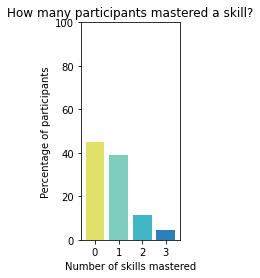

In [183]:
for p in completers:
    av_df.loc[p, "N_skills"] = 3

n_skills3 = len(av_df[av_df["N_skills"]==3]) / len(av_df)
n_skills2 = len(av_df[av_df["N_skills"]==2]) / len(av_df)
n_skills1 = len(av_df[av_df["N_skills"]==1]) / len(av_df)
n_skills0 = len(av_df[av_df["N_skills"]==0]) / len(av_df)
plt.subplot(1,3,1)
plt.bar(["0","1","2","3"],[n_skills0,n_skills1,n_skills2,n_skills3 ], color = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8"])
plt.ylabel("Percentage of participants")
plt.xlabel("Number of skills mastered")
plt.ylim(0,1)
plt.yticks([0,0.2,0.40,0.60,0.80,1],["0","20","40","60","80","100"])
plt.title("How many participants mastered a skill?")

0.45182724252491696
0.7542372881355932
0.0847457627118644
0.16101694915254236
0.23529411764705882
0.11764705882352941
0.6470588235294118


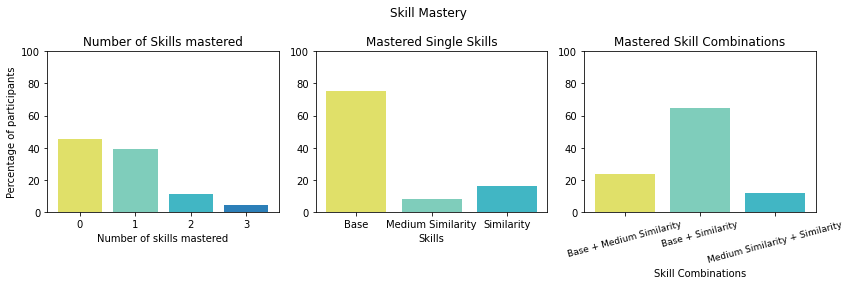

In [184]:
fig = plt.figure(figsize=(12,4))

for p in completers:
    av_df.loc[p, "N_skills"] = 3

n_skills3 = len(av_df[av_df["N_skills"]==3]) / len(av_df)
n_skills2 = len(av_df[av_df["N_skills"]==2]) / len(av_df)
n_skills1 = len(av_df[av_df["N_skills"]==1]) / len(av_df)
n_skills0 = len(av_df[av_df["N_skills"]==0]) / len(av_df)
print(n_skills0)
plt.subplot(1,3,1)
plt.bar(["0","1","2","3"],[n_skills0,n_skills1,n_skills2,n_skills3 ], color = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8"])
plt.ylabel("Percentage of participants")
plt.xlabel("Number of skills mastered")
plt.ylim(0,1)
plt.yticks([0,0.2,0.40,0.60,0.80,1],["0","20","40","60","80","100"])
plt.title("Number of Skills mastered")

n_skills1 = av_df[av_df["N_skills"]==1] 
base = len(n_skills1[n_skills1["BaseMastered"]== True]) / len(n_skills1)
medsim = len(n_skills1[n_skills1["MedsimMastered"]== True]) / len(n_skills1)
sim = len(n_skills1[n_skills1["SimMastered"]== True]) / len(n_skills1)
print(base)
print(medsim)
print(sim)
plt.subplot(1,3,2)
plt.bar(["Base", "Medium Similarity", "Similarity"],[base, medsim, sim],color = [ "#e0e069","#7fcdbb","#41b6c4"])
#plt.ylabel("Percentage of participants")
plt.xlabel("Skills")
plt.ylim(0,1)
plt.yticks([0,0.2,0.40,0.60,0.80,1],["0","20","40","60","80","100"])
plt.title("Mastered Single Skills")

n_skills1 = av_df[av_df["N_skills"]==2]
base_medsim = len(n_skills1[(n_skills1["BaseMastered"]== True) & (n_skills1["MedsimMastered"]== True)]) / len(n_skills1)
medsim_sim = len(n_skills1[(n_skills1["MedsimMastered"]== True)& (n_skills1["SimMastered"]== True)]) / len(n_skills1)
base_sim = len(n_skills1[(n_skills1["SimMastered"]== True) & (n_skills1["BaseMastered"]== True)]) / len(n_skills1)
print(base_medsim)
print(medsim_sim)
print(base_sim)
plt.subplot(1,3,3)
plt.bar(["Base + Medium Similarity", "Base + Similarity", "Medium Similarity + Similarity"],[base_medsim, base_sim ,medsim_sim],color = [ "#e0e069","#7fcdbb","#41b6c4"])
#plt.ylabel("Percentage of participants")
plt.xlabel("Skill Combinations")
plt.xticks(rotation=15, fontsize = 9)
plt.ylim(0,1)
plt.yticks([0,0.2,0.40,0.60,0.80,1],["0","20","40","60","80","100"])
plt.title("Mastered Skill Combinations")
plt.suptitle("Skill Mastery")
plt.tight_layout()

Text(0.5, 1.0, 'Which skills did Particpants who mastered 2 skill master?')

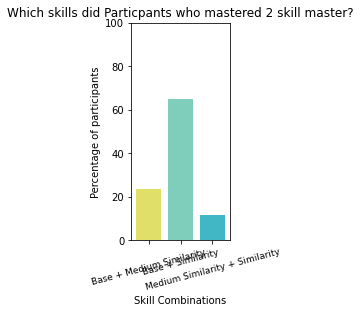

In [185]:
n_skills1 = av_df[av_df["N_skills"]==2]
base_medsim = len(n_skills1[(n_skills1["BaseMastered"]== True) & (n_skills1["MedsimMastered"]== True)]) / len(n_skills1)
medsim_sim = len(n_skills1[(n_skills1["MedsimMastered"]== True)& (n_skills1["SimMastered"]== True)]) / len(n_skills1)
base_sim = len(n_skills1[(n_skills1["SimMastered"]== True) & (n_skills1["BaseMastered"]== True)]) / len(n_skills1)
plt.subplot(1,3,3)
plt.bar(["Base + Medium Similarity", "Base + Similarity", "Medium Similarity + Similarity"],[base_medsim, base_sim ,medsim_sim],color = [ "#e0e069","#7fcdbb","#41b6c4"])
plt.ylabel("Percentage of participants")
plt.xlabel("Skill Combinations")
plt.xticks(rotation=15, fontsize = 9)
plt.ylim(0,1)
plt.yticks([0,0.2,0.40,0.60,0.80,1],["0","20","40","60","80","100"])
plt.title("Which skills did Particpants who mastered 2 skill master?")


### Scores

301
KruskalResult(statistic=181.15100285230824, pvalue=4.6084993970060684e-40)
MannwhitneyuResult(statistic=65714.0, pvalue=1.1013260981020737e-21)
MannwhitneyuResult(statistic=72159.5, pvalue=2.4667131871569727e-36)
MannwhitneyuResult(statistic=55441.5, pvalue=2.0088139121783726e-06)
(array([ True,  True,  True]), array([1.65198915e-21, 7.40013956e-36, 2.00881391e-06]), 0.016952427508441503, 0.016666666666666666)


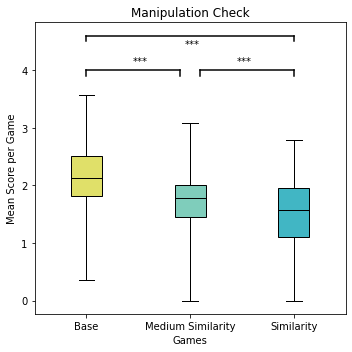

In [186]:
av_df["Score0"] = df.groupby("Participant")["weightedScoreA"].mean()
av_df["Score1"] = df.groupby("Participant")["weightedScoreB"].mean()
av_df["Score2"] = df.groupby("Participant")["weightedScoreC"].mean()
base_score = []
medsim_score = []
sim_score = []
for participant in av_df.index:
    base_score.append( av_df.loc[participant, "Score"+str(av_df.loc[participant, "BaseChoices"])])
    medsim_score.append( av_df.loc[participant, "Score"+str(av_df.loc[participant, "MedsimChoices"])])
    sim_score.append( av_df.loc[participant, "Score"+str(av_df.loc[participant, "SimChoices"])])
print(len(sim_score))    
av_df["BaseScore"] = base_score
av_df["MedsimScore"] = medsim_score
av_df["SimScore"] = sim_score
data =[ av_df["BaseScore"], av_df["MedsimScore"],av_df["SimScore"]]
flierprops = dict(marker='o', markerfacecolor='k',markersize=1, linestyle='none')
medianprops = dict(color = "k")
   
plt.figure(figsize=(5,5))   
b = plt.boxplot(data, labels = ["Base", "Medium Similarity", "Similarity"], flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
for patch, color in zip(b['boxes'], colors):
    patch.set_facecolor(color)
#plt.ylim(-0.1,4)

print(scipy.stats.kruskal(data[0],data[1], data[2]))
print(scipy.stats.mannwhitneyu(data[0],data[1]))
a, p1 = scipy.stats.mannwhitneyu(data[0],data[1])
print(scipy.stats.mannwhitneyu(data[0],data[2]))
a, p2 = scipy.stats.mannwhitneyu(data[0],data[2])
print(scipy.stats.mannwhitneyu(data[1],data[2]))
a, p3 = scipy.stats.mannwhitneyu(data[1],data[2])
print(multipletests([p1,p2,p3], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))

plt.plot([1,1.9], [4,4], color = "k")
plt.plot([1,3], [4.6,4.6], color = "k")
plt.plot([2.1,3], [4,4], color = "k")
plt.plot([1.9,1.9], [3.9,4], color = "k")
plt.plot([1,1], [3.9,4], color = "k")
plt.plot([2.1,2.1], [3.9, 4], color = "k")
plt.plot([3,3], [3.9,4], color = "k")
plt.plot([1,1], [4.5,4.6], color = "k")
plt.plot([3,3], [4.5,4.6], color = "k")
plt.annotate("***" , (1.45, 4.1))
plt.annotate("***" , (1.95, 4.4))
plt.annotate("***" , (2.45, 4.1))
plt.xlabel("Games")
plt.ylabel("Mean Score per Game")
plt.title("Manipulation Check")
plt.tight_layout()

KruskalResult(statistic=26.576166753742033, pvalue=1.6945668815883015e-06)
MannwhitneyuResult(statistic=37799.0, pvalue=0.0004301670946820736)
MannwhitneyuResult(statistic=34835.0, pvalue=9.067281524779914e-07)
MannwhitneyuResult(statistic=41373.5, pvalue=0.06536822105557584)
(array([ True,  True, False]), array([6.45250642e-04, 2.72018446e-06, 6.53682211e-02]), 0.016952427508441503, 0.016666666666666666)


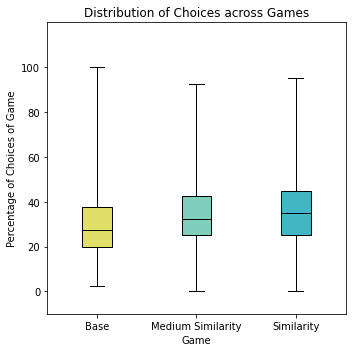

In [187]:
data =[ av_df["Perc_BaseChoice"], av_df["Perc_MedsimChoice"],av_df["Perc_SimChoice"]]
flierprops = dict(marker='o', markerfacecolor='k',markersize=1, linestyle='none')
medianprops = dict(color = "k")
   
plt.figure(figsize=(5,5))   
b = plt.boxplot(data, labels = ["Base", "Medium Similarity", "Similarity"], flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
for patch, color in zip(b['boxes'], colors):
    patch.set_facecolor(color)
#plt.ylim(-0.1,4)

print(scipy.stats.kruskal(data[0],data[1], data[2]))
print(scipy.stats.mannwhitneyu(data[0],data[1]))
a, p1 = scipy.stats.mannwhitneyu(data[0],data[1])
print(scipy.stats.mannwhitneyu(data[0],data[2]))
a, p2 = scipy.stats.mannwhitneyu(data[0],data[2])
print(scipy.stats.mannwhitneyu(data[1],data[2]))
a, p3 = scipy.stats.mannwhitneyu(data[1],data[2])
print(multipletests([p1,p2,p3], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))


plt.annotate("***" , (1.45, 4.1))
plt.annotate("***" , (1.95, 4.4))
plt.annotate("***" , (2.45, 4.1))
plt.xlabel("Game")
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.ylabel("Percentage of Choices of Game")
plt.title("Distribution of Choices across Games")
plt.tight_layout()
plt.show()

In [188]:
df.columns

Index(['Participant', 'Condition', 'TrialId', 'Trial_Type', 'Trialtime', 'Key',
       'RT', 'ResponseTime', 'Correct_Response', 'Block', 'Associated',
       'Stimulus_ID', 'QR_before', 'QR_after', 'Game Choice', 'Time Budget',
       'MDP-State', 'Brain Points', 'Forced Choice', 'Point_Mapping', 'scoreA',
       'scoreB', 'scoreC', 'score', 'completed', 'Game0_cum', 'Game1_cum',
       'Game2_cum', 'weightedScoreA', 'weightedScoreB', 'weightedScoreC',
       'HS_chosen', 'HPshown_chosen', 'HPoptimal_chosen', 'BaseMastered',
       'MedsimMastered', 'SimMastered', 'N_skills'],
      dtype='object')

In [189]:
av_df.head()

,Final State,Learned Words,QR-Sum,Condition,Mapping,BaseChoices,MedsimChoices,SimChoices,Choice0,Choice1,Choice2,N_BaseChoices,N_MedsimChoices,N_SimChoices,N_Choices,Perc_BaseChoice,Perc_MedsimChoice,Perc_SimChoice,HS_Chosen,HPshown_chosen,HPoptimal_chosen,BaseMastered,MedsimMastered,SimMastered,N_skills,N_BaseChoices_ASA,N_MedsimChoices_ASA,N_SimChoices_ASA,N_Choices_ASA,Perc_BaseChoice_ASA,Perc_MedsimChoice_ASA,Perc_SimChoice_ASA,HS_Chosen_ASA,HPshown_chosen_ASA,HPoptimal_chosen_ASA,Learned Words ASA,QR-Sum ASA,Learned Words Increase ASA,QR-Sum Increase ASA,Free Choice,Point Type,Score0,Score1,Score2,BaseScore,MedsimScore,SimScore
Participant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5b0ac060451e0f0001a0fca6,000040100701016,17,73,4,"[c, b, a]",2,1,0,14.0,16.0,10.0,10.0,16.0,14.0,40.0,0.250,0.400,0.350,0.275,1.0,1.0,True,True,False,2,10.0,16.0,14.0,40.0,0.250,0.400,0.350,0.0,1.0,1.0,17.0,73.0,1.0,2.0,0,2,0.878131,1.850353,2.353952,2.353952,1.850353,0.878131
5b3b5f13dd6af000014d2a68,011200215002006,6,54,2,"[b, c, a]",2,0,1,13.0,23.0,4.0,4.0,13.0,23.0,40.0,0.100,0.325,0.575,0.35,1.0,1.0,False,False,False,0,4.0,13.0,23.0,40.0,0.100,0.325,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2.120563,1.108645,1.605533,1.605533,2.120563,1.108645
5b5393228fb8db0001a81c7e,020200323000008,8,56,0,"[a, b, c]",0,1,2,3.0,7.0,30.0,3.0,7.0,30.0,40.0,0.075,0.175,0.750,0.2,0.775,0.775,False,False,True,1,3.0,7.0,30.0,40.0,0.075,0.175,0.750,0.0,0.0,0.0,8.0,56.0,0.0,0.0,1,0,2.424863,2.617037,2.160874,2.424863,2.617037,2.160874
5b8b1831c1113100015f88ac,001030002600026,15,74,4,"[b, c, a]",2,0,1,17.0,16.0,7.0,7.0,17.0,16.0,40.0,0.175,0.425,0.400,0.175,1.0,1.0,False,False,False,0,7.0,17.0,16.0,40.0,0.175,0.425,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1.407594,0.705192,2.674200,2.674200,1.407594,0.705192
5bd87898f2d1e600015b9918,011020112402231,7,55,0,"[b, c, a]",2,0,1,13.0,14.0,13.0,13.0,13.0,14.0,40.0,0.325,0.325,0.350,0.375,1.0,1.0,False,False,False,0,13.0,13.0,14.0,40.0,0.325,0.325,0.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.304391,1.263426,1.075573,1.075573,1.304391,1.263426


## Hypothesis Testing

In [190]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [191]:
part_df = av_df[av_df["Condition"]!= 0]

In [223]:
def basic_plot(var, conditions, filtered = False):
    flierprops = dict(marker='o', markerfacecolor='k',markersize=1, linestyle='none')
    medianprops = dict(color = "k")
    plt.figure(figsize=(6,4))
    print(scipy.stats.shapiro(av_df[var]))
    label_list = ["Control", "OBP", "OBP_FC", "ABP", "ABP_FC"]
    data = []
    labels = []
    for condition in conditions:
        if filtered:
            x = av_df[av_df["N_skills"]> 1]
            data.append(x[x["Condition"]==condition][var])
        else:
            data.append(av_df[av_df["Condition"]==condition][var])
        
        labels.append(label_list[condition])
    for d in data:
        print("m",d.median())
        print("h",d.quantile(0.75))
        print("l",d.quantile(0.25))
        print("IQR", d.quantile(0.75) - d.quantile(0.25))
    b = plt.boxplot(data, labels = labels,flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
    colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
    for patch, color in zip(b['boxes'], colors):
        patch.set_facecolor(color)
def get_anova(var):
    label_list = [ "OBP", "OBP_FC", "ABP", "ABP_FC"]
    data = []
    labels = []
    part_df = av_df[av_df["Condition"]!= 0]
    for i in range(1,5):
        data.append(list(part_df[part_df["Condition"]==i][var]))
    #print(data)
    print(scipy.stats.levene(*data))
    
    part_df['rankDV'] = part_df[var].rank()
    print(scipy.stats.shapiro(part_df['rankDV']))
    #print(part_df['rankLW'])
    
    print(pingouin.anova(data = part_df, dv = "rankDV", between = ["Free Choice", "Point Type" ] , effsize="np2").round(3))
    
def get_kruskall(var, conditions, filtered = False):
    label_list = ["Control", "OBP", "OBP_FC", "ABP", "ABP_FC"]
    data = []
    labels = []
    for condition in conditions:
        if filtered:
            x = av_df[av_df["N_skills"]> 1]
            data.append(x[x["Condition"]==condition][var])
        else:
            data.append(av_df[av_df["Condition"]==condition][var])
    print(scipy.stats.kruskal(*data))
    
def get_mann_whits(var, conditions, filtered = False):
    label_list = ["Control", "OBP", "OBP_FC", "ABP", "ABP_FC"]
    data = []
    labels = []
    for condition in conditions:
        if filtered:
            x = av_df[av_df["N_skills"]> 1]
            data.append(list(x[x["Condition"]==condition][var]))
        else:
            data.append(list(av_df[av_df["Condition"]==condition][var]))
    a, b = scipy.stats.mannwhitneyu(data[0],data[1])
    return a,b

    

### Learning Progress

8.0
IQR 5.75
9.0
IQR 5.0


Text(0, 0.5, 'Nr of Learned Word Pairs')

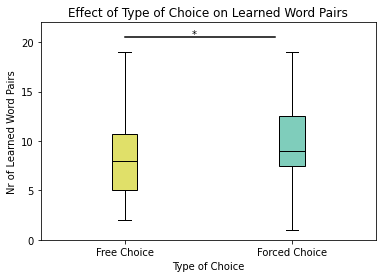

In [257]:
pd.options.mode.chained_assignment = None  # default='warn'
#get_anova("Learned Words")
print(part_df[part_df["Free Choice"]==1]["Learned Words"].median())
print("IQR", part_df[part_df["Free Choice"]==1]["Learned Words"].quantile(0.75) - part_df[part_df["Free Choice"]==1]["Learned Words"].quantile(0.25))
print(part_df[part_df["Free Choice"]==0]["Learned Words"].median())
print("IQR", part_df[part_df["Free Choice"]==0]["Learned Words"].quantile(0.75) - part_df[part_df["Free Choice"]==0]["Learned Words"].quantile(0.25))

data = [part_df[part_df["Free Choice"]==1]["Learned Words"], part_df[part_df["Free Choice"]==0]["Learned Words"] ]
b = plt.boxplot(data, labels = ["Free Choice", "Forced Choice"],flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
for patch, color in zip(b['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim(0,22)  
plt.yticks([0,5,10,15,20])
plt.xlabel("Type of Choice")
plt.plot([1,1.9], [20.5,20.5], color = "k")
plt.annotate("*" , (1.4, 20.5))
plt.title("Effect of Type of Choice on Learned Word Pairs")
plt.ylabel("Nr of Learned Word Pairs")

8.0
IQR 5.75
9.0
IQR 6.5


Text(0, 0.5, 'Nr of Learned Word Pairs')

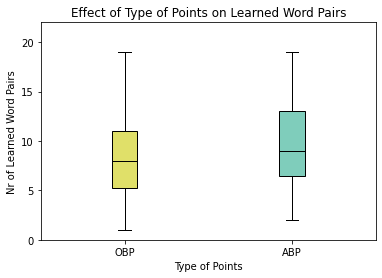

In [256]:
print(part_df[part_df["Point Type"]==1]["Learned Words"].median())
print("IQR", part_df[part_df["Point Type"]==1]["Learned Words"].quantile(0.75) - part_df[part_df["Point Type"]==1]["Learned Words"].quantile(0.25))

print(part_df[part_df["Point Type"]==2]["Learned Words"].median())
print("IQR", part_df[part_df["Point Type"]==2]["Learned Words"].quantile(0.75) - part_df[part_df["Point Type"]==2]["Learned Words"].quantile(0.25))
data = [part_df[part_df["Point Type"]==1]["Learned Words"], part_df[part_df["Point Type"]==2]["Learned Words"] ]
b = plt.boxplot(data, labels = ["OBP", "ABP"],flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
for patch, color in zip(b['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim(0,22)  
plt.yticks([0,5,10,15,20])
plt.xlabel("Type of Points")

plt.title("Effect of Type of Points on Learned Word Pairs")
plt.ylabel("Nr of Learned Word Pairs")

58.0
IQR 10.0
59.0
IQR 13.0


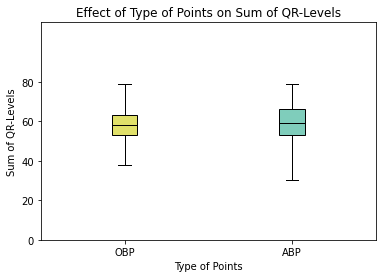

In [255]:
print(part_df[part_df["Point Type"]==1]["QR-Sum"].median())
print("IQR", part_df[part_df["Point Type"]==1]["QR-Sum"].quantile(0.75) - part_df[part_df["Point Type"]==1]["QR-Sum"].quantile(0.25))

print(part_df[part_df["Point Type"]==2]["QR-Sum"].median())
print("IQR", part_df[part_df["Point Type"]==2]["QR-Sum"].quantile(0.75) - part_df[part_df["Point Type"]==2]["QR-Sum"].quantile(0.25))

data = [part_df[part_df["Point Type"]==1]["QR-Sum"], part_df[part_df["Point Type"]==2]["QR-Sum"] ]
b = plt.boxplot(data, labels = ["OBP", "ABP"],flierprops = flierprops,
                             patch_artist=True
                            , medianprops = medianprops
                            , whis = 100 )  
colors = [ "#e0e069","#7fcdbb","#41b6c4","#2c7fb8","#253494"]
for patch, color in zip(b['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title("Effect of Type of Points on Sum of QR-Levels")
plt.ylabel("Sum of QR-Levels")
plt.xlabel("Type of Points")
plt.ylim(0,110)
plt.yticks([0,20,40,60,80],["0","20","40","60","80"])


plt.show()

ShapiroResult(statistic=0.9688093662261963, pvalue=4.2295177991036326e-06)
m 54.0
h 57.0
l 47.75
IQR 9.25
m 57.0
h 62.0
l 53.0
IQR 9.0
m 56.0
h 62.0
l 52.0
IQR 10.0
KruskalResult(statistic=8.456076656173227, pvalue=0.014580965582485032)
1393.5 1503.0 1729.5
(array([ True,  True, False]), array([0.02080379, 0.04655443, 0.55322549]), 0.016952427508441503, 0.016666666666666666)


Text(2, 100, '*')

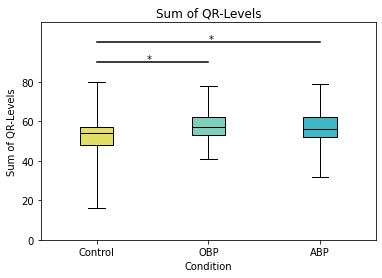

In [217]:
basic_plot("QR-Sum", [0,1,3])
    
get_kruskall("QR-Sum", [0,1,3])
stat01, p01 = get_mann_whits("QR-Sum", [0,1])
stat03, p03 =get_mann_whits("QR-Sum", [0,3])
stat13, p13 =get_mann_whits("QR-Sum", [1,3])
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))
plt.title("Sum of QR-Levels")
plt.xlabel("Condition")
plt.ylabel("Sum of QR-Levels")
plt.ylim(0,110)
plt.yticks([0,20,40,60,80],["0","20","40","60","80"])
plt.plot([1,2], [90,90], color = "k")
plt.plot([1,3], [100,100], color = "k")
plt.annotate("*" , (1.45, 90))
plt.annotate("*" , (2, 100))


ShapiroResult(statistic=0.9333406686782837, pvalue=2.240712754231211e-10)
m 7.0
h 8.0
l 4.0
IQR 4.0
m 9.0
h 11.0
l 6.0
IQR 5.0
m 7.0
h 10.0
l 5.0
IQR 5.0
KruskalResult(statistic=8.968556371150804, pvalue=0.011285030279244332)
1321.0 1687.5 1883.0
(array([ True, False, False]), array([0.00598163, 0.2110015 , 0.2110015 ]), 0.016952427508441503, 0.016666666666666666)


Text(0.5, 0, 'Condition')

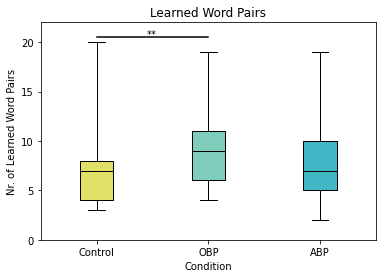

In [215]:
basic_plot("Learned Words", [0,1,3])
plt.title("Learned Word Pairs")
get_kruskall("Learned Words", [0,1,3])
stat01, p01 = get_mann_whits("Learned Words", [0,1])
stat03, p03 =get_mann_whits("Learned Words", [0,3])
stat13, p13 =get_mann_whits("Learned Words", [1,3])
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))

plt.plot([1,2], [20.5,20.5], color = "k")
plt.ylim(0,22)
plt.yticks([0,5,10,15,20])
plt.annotate("**" , (1.45, 20.5))
plt.ylabel("Nr. of Learned Word Pairs")
plt.xlabel("Condition")


ShapiroResult(statistic=0.9333406686782837, pvalue=2.240712754231211e-10)
m 7.0
h 8.0
l 4.0
IQR 4.0
m 9.0
h 11.0
l 6.0
IQR 5.0
m 8.0
h 11.0
l 5.0
IQR 6.0
m 7.0
h 10.0
l 5.0
IQR 5.0
m 9.5
h 15.0
l 8.0
IQR 7.0
KruskalResult(statistic=40.76964453281919, pvalue=2.999782866014655e-08)
1321.0 1687.5 1883.0
(array([ True, False, False,  True, False, False,  True, False,  True,
        True]), array([4.70203959e-03, 7.67169132e-02, 2.63751873e-01, 5.01025467e-09,
       5.21750038e-01, 2.02757113e-01, 4.70203959e-03, 4.97434534e-01,
       1.60821326e-03, 2.53622274e-05]), 0.005116196891823743, 0.005)


Text(0.5, 0, 'Condition')

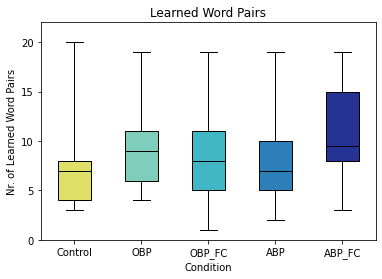

In [225]:
basic_plot("Learned Words", [0,1,2,3,4])
plt.title("Learned Word Pairs")
get_kruskall("Learned Words", [0,1,2,3,4])
stat01, p01 = get_mann_whits("Learned Words", [0,1])
stat02, p02 = get_mann_whits("Learned Words", [0,2])
stat03, p03 =get_mann_whits("Learned Words", [0,3])
stat04, p04 = get_mann_whits("Learned Words", [0,4])
stat12, p12 =get_mann_whits("Learned Words", [1,2])
stat13, p13 =get_mann_whits("Learned Words", [1,3])
stat14, p14 =get_mann_whits("Learned Words", [1,4])
stat23, p23 =get_mann_whits("Learned Words", [2,3])
stat24, p24 =get_mann_whits("Learned Words", [2,4])
stat34, p34 =get_mann_whits("Learned Words", [3,4])
print(stat01, stat03, stat13)
pvals = [p01,p02,p03, p04,p12,p13,p14,p23,p24,p34]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))

#plt.plot([1,2], [20.5,20.5], color = "k")
plt.ylim(0,22)
plt.yticks([0,5,10,15,20])
#plt.annotate("**" , (1.45, 20.5))
plt.ylabel("Nr. of Learned Word Pairs")
plt.xlabel("Condition")

In [232]:
free = part_df[part_df["Free Choice"] == 1]
forced = part_df[part_df["Free Choice"] == 0]
obp = part_df[part_df["Point Type"] == 1]
abp = part_df[part_df["Point Type"] == 2]
print(scipy.stats.mannwhitneyu(free["Learned Words"],forced["Learned Words"]))
print(scipy.stats.mannwhitneyu(free["QR-Sum"],forced["QR-Sum"]))
print(scipy.stats.mannwhitneyu(obp["Learned Words"],abp["Learned Words"]))
print(scipy.stats.mannwhitneyu(obp["QR-Sum"],abp["QR-Sum"]))




MannwhitneyuResult(statistic=5340.5, pvalue=0.004889968812983796)
MannwhitneyuResult(statistic=5403.5, pvalue=0.007290339614185594)
MannwhitneyuResult(statistic=5954.0, pvalue=0.10590136004727863)
MannwhitneyuResult(statistic=6359.0, pvalue=0.40990902446718913)


### Choice Behaviour

ShapiroResult(statistic=0.8708297610282898, pvalue=3.3673574589528424e-15)
m 0.35
h 0.45
l 0.26875000000000004
IQR 0.18124999999999997
m 0.3
h 0.375
l 0.225
IQR 0.15
m 0.3
h 0.4
l 0.25
IQR 0.15000000000000002
KruskalResult(statistic=4.90460155183223, pvalue=0.08609527251933446)


Text(0.5, 0, 'Condition')

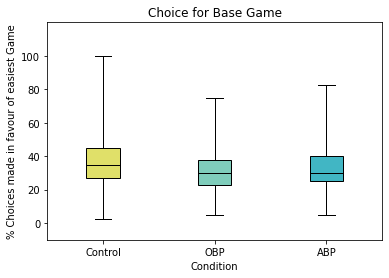

In [199]:
basic_plot("Perc_BaseChoice", [0,1,3])

get_kruskall("Perc_BaseChoice", [0,1,3])

plt.ylabel("% Choices made in favour of easiest Game")
plt.title("Choice for Base Game")
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.xlabel("Condition")

ShapiroResult(statistic=0.9251638650894165, pvalue=3.81021950102145e-11)
m 0.4
h 0.53125
l 0.33125
IQR 0.2
m 0.375
h 0.425
l 0.3
IQR 0.125
m 0.325
h 0.425
l 0.275
IQR 0.14999999999999997
KruskalResult(statistic=8.756564881817917, pvalue=0.01254689015018616)
2216.5 2527.5 1900.0
(array([False,  True, False]), array([0.167245  , 0.01033019, 0.167245  ]), 0.016952427508441503, 0.016666666666666666)


Text(0.5, 0, 'Condition')

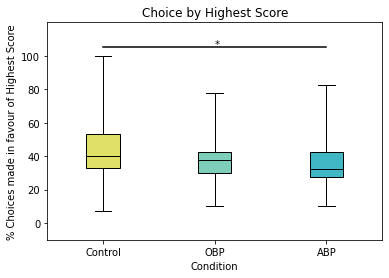

In [200]:


basic_plot("HS_Chosen", [0,1,3])
get_kruskall("HS_Chosen", [0,1,3])
stat01, p01 =get_mann_whits("HS_Chosen", [0,1])
stat03, p03 =get_mann_whits("HS_Chosen", [0,3])
stat13, p13 =get_mann_whits("HS_Chosen", [1,3])
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))


plt.plot([1,3], [1.05,1.05], color = "k")

plt.annotate("*" , (2, 1.05))
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.ylabel("% Choices made in favour of Highest Score")
plt.title("Choice by Highest Score")
plt.xlabel("Condition")

ShapiroResult(statistic=0.4661843776702881, pvalue=4.9806477301063845e-29)
m 0.9
h 1.0
l 0.76875
IQR 0.23124999999999996
m 1.0
h 1.0
l 0.95
IQR 0.050000000000000044
m 1.0
h 1.0
l 0.975
IQR 0.025000000000000022
KruskalResult(statistic=19.67556970500931, pvalue=5.339545903003722e-05)
1344.0 1167.0 1409.5
(array([ True,  True, False]), array([3.02922642e-03, 1.20515254e-04, 1.69476758e-01]), 0.016952427508441503, 0.016666666666666666)


Text(0.5, 0, 'Condition')

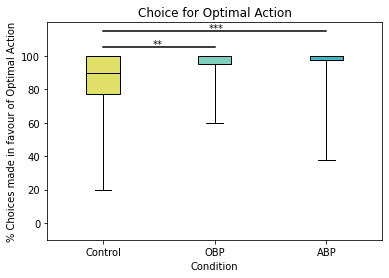

In [202]:
basic_plot("HPoptimal_chosen", [0,1,3])
get_kruskall("HPoptimal_chosen",[0,1,3])  

stat01, p01 =get_mann_whits("HPoptimal_chosen", [0,1])
stat03, p03 =get_mann_whits("HPoptimal_chosen", [0,3])
stat13, p13 =get_mann_whits("HPoptimal_chosen", [1,3])
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))

plt.plot([1,2], [1.05,1.05], color = "k")
plt.plot([1,3], [1.15,1.15], color = "k")

plt.annotate("***" , (1.95, 1.15))
plt.annotate("**" , (1.44, 1.05))
plt.ylabel("% Choices made in favour of Optimal Action")
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.title("Choice for Optimal Action")
plt.xlabel("Condition")

In [203]:
av_df[av_df["N_skills"]> 1]["HS_Chosen_ASA"]

Participant
5b0ac060451e0f0001a0fca6         0.0
5e064bb24cac68036b16461f         0.5
5eb052594479b80d3f9cc8fa    0.041667
5eb9b220b0ccaa0e66c543cd         0.0
5f1afac4a6090e27181f302d         0.8
5f823bd500e06c3654eaf783    0.090909
5fb8856ae827395f874d2dba    0.066667
5fbab1b8266280ad6e6e13c7         0.2
5ffee53a2848ac5ea875dd3c        0.04
6017ecc7d007c638dfdfcd21    0.428571
6027abb37057060008ef3633         0.0
603e3f4f0f7543e3a7ac39c4    0.538462
609ab970bcff69957427445d        0.95
60a01e4c19b0cf07fe83ea65    0.041667
60ca1c436511b9fc8ab35615       0.625
60f9baa99f49184f083a9ce8    0.428571
60fdc9558b132366c2a72f1a    0.052632
610869d857d731ac2ce91a5d         0.0
6110e09c92353648c7853f30         0.0
613a5f26bc0fe083dc734509       0.125
613a6bea58734fc4aa745ce8         0.0
613a7642d3ecae4c93999725       0.125
613ac0dff377bf78833b767f       0.375
613c96251354a2ab1529c6f6         0.4
6140ef8d27499e70e8740918         0.0
6144e1726c6ad6814dcf06e7         0.0
61475ceec9cea78cda3c01df  

ShapiroResult(statistic=nan, pvalue=1.0)
m 0.75
h 0.85
l 0.5795454545454546
IQR 0.2704545454545454
m 0.09523809523809523
h 0.2
l 0.05555555555555555
IQR 0.14444444444444446
m 0.04714912280701754
h 0.2631578947368421
l 0.04041666666666667
IQR 0.22274122807017543
KruskalResult(statistic=7.6222426069104054, pvalue=0.022123358045933697)
39.0 18.0 44.0
[0.01029956283544892, 0.023809523809523808, 0.6917962346361441]
(array([ True,  True, False]), array([0.03089869, 0.03571429, 0.69179623]), 0.016952427508441503, 0.016666666666666666)


Text(0.5, 0, 'Condition')

<Figure size 144x720 with 0 Axes>

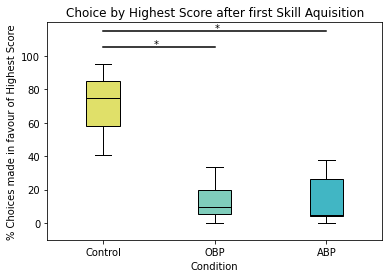

In [204]:

fig = plt.figure(figsize = (2,10))
basic_plot("HS_Chosen_ASA", [0,1,3], True)
get_kruskall("HS_Chosen_ASA", [0,1,3], True)
stat01, p01 =get_mann_whits("HS_Chosen_ASA", [0,1], True)
stat03, p03 =get_mann_whits("HS_Chosen_ASA", [0,3], True)
stat13, p13 =get_mann_whits("HS_Chosen_ASA", [1,3], True)
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(pvals)
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))
plt.plot([1,2], [1.05,1.05], color = "k")
plt.plot([1,3], [1.15,1.15], color = "k")

plt.annotate("*" , (2, 1.15))
plt.annotate("*" , (1.45, 1.05))
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
#plt.plot([1,3], [1.1,1.1], color = "k")

#plt.annotate("**" , (2, 1.1))
plt.ylabel("% Choices made in favour of Highest Score")
plt.title("Choice by Highest Score after first Skill Aquisition")
plt.xlabel("Condition")

ShapiroResult(statistic=nan, pvalue=1.0)
m 0.35
h 0.5386363636363636
l 0.3
IQR 0.2386363636363636
m 0.95
h 1.0
l 0.9047619047619048
IQR 0.09523809523809523
m 0.9181286549707601
h 0.9568421052631578
l 0.8784722222222222
IQR 0.07836988304093562
KruskalResult(statistic=6.701052981600524, pvalue=0.03506588737288557)
2.0 0.0 44.5
(array([ True,  True, False]), array([0.04129784, 0.04129784, 0.65587062]), 0.016952427508441503, 0.016666666666666666)


Text(0.5, 0, 'Condition')

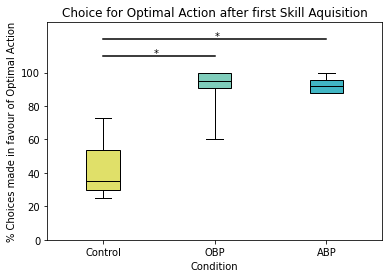

In [205]:
basic_plot("HPoptimal_chosen_ASA", [0,1,3], True)
get_kruskall("HPoptimal_chosen_ASA",[0,1,3], True)  

stat01, p01 =get_mann_whits("HPoptimal_chosen_ASA", [0,1], True)
stat03, p03 =get_mann_whits("HPoptimal_chosen_ASA", [0,3], True)
stat13, p13 =get_mann_whits("HPoptimal_chosen_ASA", [1,3], True)
print(stat01, stat03, stat13)
pvals = [p01,p03,p13]
print(multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False))

plt.plot([1,2], [1.1,1.1], color = "k")
plt.plot([1,3], [1.2,1.2], color = "k")
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.annotate("*" , (2, 1.2))
plt.annotate("*" , (1.45, 1.1))
plt.ylabel("% Choices made in favour of Optimal Action")
plt.ylim(0,1.3)
plt.title("Choice for Optimal Action after first Skill Aquisition")
plt.xlabel("Condition")

ShapiroResult(statistic=0.8708297610282898, pvalue=3.3673574589528424e-15)
m 0.28205128205128205
h 0.41602564102564105
l 0.16602564102564102
IQR 0.25
m 0.25
h 0.3
l 0.23529411764705882
IQR 0.06470588235294117
m 0.2517857142857143
h 0.275
l 0.22589285714285715
IQR 0.04910714285714288
KruskalResult(statistic=0.43167382162255347, pvalue=0.8058667193062778)


Text(0.5, 0, 'Condition')

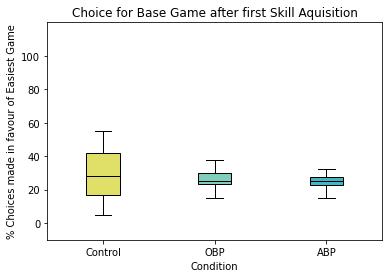

In [206]:
basic_plot("Perc_BaseChoice_ASA", [0,1,3], True)

get_kruskall("Perc_BaseChoice_ASA", [0,1,3], True)

plt.ylabel("% Choices made in favour of Easiest Game")
plt.ylim(-0.1,1.2)
plt.yticks([0,0.2,0.4,0.6,0.8,1],["0","20","40","60","80","100"])
plt.title("Choice for Base Game after first Skill Aquisition")
plt.xlabel("Condition")